In [2]:
#%matplotlib qt
%matplotlib inline

In [36]:
import pandas as pd
import numpy as np
import scipy.stats as st
from ggplot import *
import datetime

import matplotlib.pyplot as plt

In [4]:
turnstile_weather = pd.read_csv('./improved-dataset/turnstile_weather_v2.csv')

# Quick look at the data

In [5]:
turnstile_weather.columns.values

array(['UNIT', 'DATEn', 'TIMEn', 'ENTRIESn', 'EXITSn', 'ENTRIESn_hourly',
       'EXITSn_hourly', 'datetime', 'hour', 'day_week', 'weekday',
       'station', 'latitude', 'longitude', 'conds', 'fog', 'precipi',
       'pressurei', 'rain', 'tempi', 'wspdi', 'meanprecipi',
       'meanpressurei', 'meantempi', 'meanwspdi', 'weather_lat',
       'weather_lon'], dtype=object)

In [6]:
turnstile_weather.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0,30.258,55.98,7.86,40.700348,-73.887177


In [7]:
turnstile_weather.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


# What days have been raining?

In [8]:
turnstile_weather['DAYn'] = turnstile_weather.datetime.map(lambda x: pd.to_datetime(x).day)

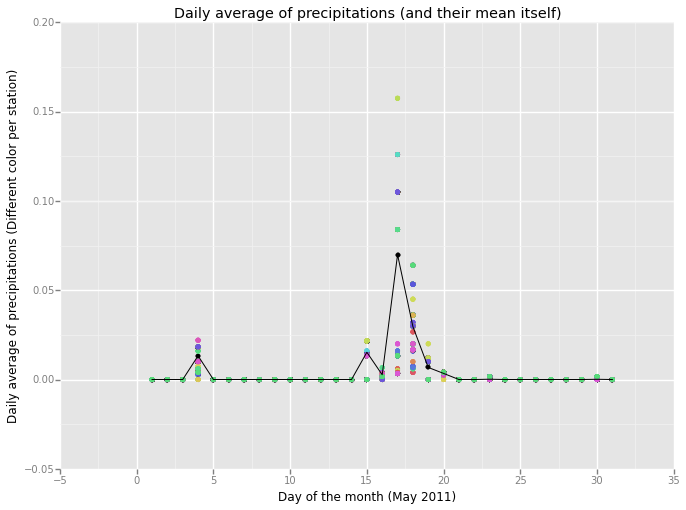

<ggplot: (280512573)>

In [9]:
mean_values = turnstile_weather[['DAYn','meanprecipi', 'meanpressurei', 'meantempi', 'meanwspdi']].groupby('DAYn').mean()
p = ggplot(mean_values.reset_index(), aes(x='DAYn', y='meanprecipi')) + \
    geom_point() + geom_line() + \
    geom_point(turnstile_weather, aes(x='DAYn', y='meanprecipi', color='station')) + \
    ggtitle("Daily average of precipitations (and their mean itself)") + \
    xlab("Day of the month (May 2011)") + \
    ylab("Daily average of precipitations (Different color per station)")
p

# Ridership in both data sets (rain and no-rain)
Are the two distributions (rain vs no-rain) statistically different from each other?

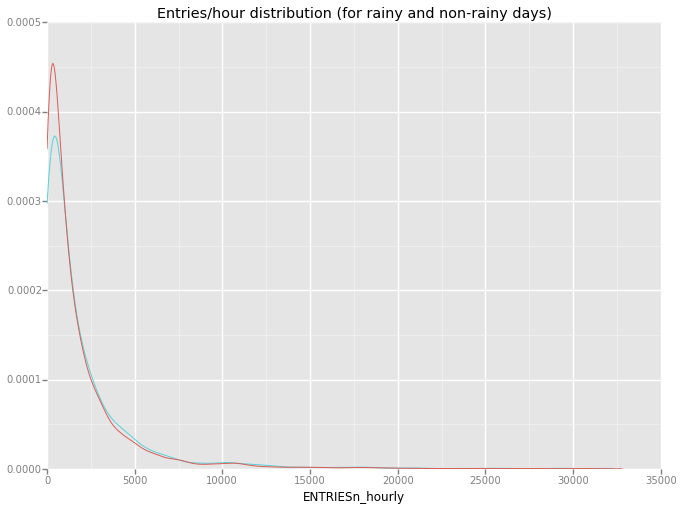

<ggplot: (280509657)>

In [10]:
p = ggplot(turnstile_weather, aes(x='ENTRIESn_hourly', colour='rain')) + geom_density() +\
    ggtitle("Entries/hour distribution (for rainy and non-rainy days)")
p

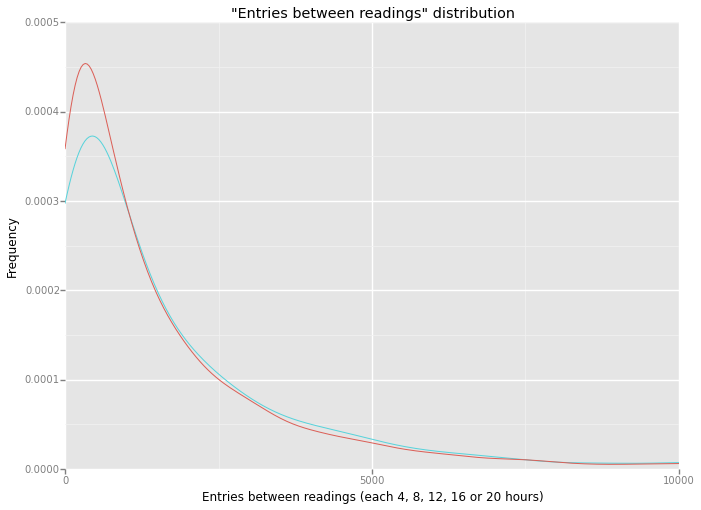

<ggplot: (277083325)>

In [11]:
p = ggplot(turnstile_weather, aes(x='ENTRIESn_hourly', colour='rain')) + geom_density() + xlim(0,10000) +\
    ggtitle('"Entries between readings" distribution') +\
    xlab("Entries between readings (each 4, 8, 12, 16 or 20 hours)") +\
    ylab("Frequency")
p

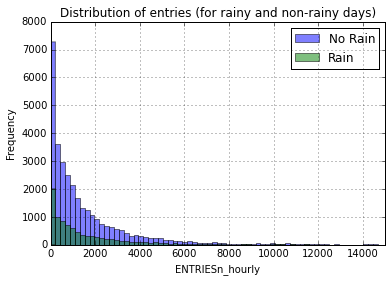

In [75]:
rain = turnstile_weather.ENTRIESn_hourly[turnstile_weather.rain == 1]
no_rain = turnstile_weather.ENTRIESn_hourly[turnstile_weather.rain == 0]
result = pd.DataFrame({'Rain': rain, 'No Rain': no_rain})
plt.figure()
result.plot(kind='hist', bins=150, alpha=0.5)
plt.title('Distribution of entries (for rainy and non-rainy days)')
plt.xlabel('ENTRIESn_hourly')
plt.ylabel('Frequency')
plt.xlim(0, 15000)
plt.show()

In [73]:
turnstile_weather.ENTRIESn_hourly.max()

32814.0

In [12]:
turnstile_weather[['rain','ENTRIESn_hourly']].groupby('rain').describe()

ENTRIESn_hourly
rain                       
0    count     33064.000000
     mean       1845.539439
     std        2878.770848
     min           0.000000
     25%         269.000000
     50%         893.000000
     75%        2197.000000
     max       32814.000000
1    count      9585.000000
     mean       2028.196035
     std        3189.433373
     min           0.000000
     25%         295.000000
     50%         939.000000
     75%        2424.000000
     max       32289.000000

As we can see, the mean is bigger in the case of raining situations. Is it a siginificant difference?

Let's make a t-test to check whether or not two populations are different, that is, there is a different in the number of people that takes the train when it's raining than when it's not raining.

In [13]:
rain = turnstile_weather[turnstile_weather.rain == 1]
no_rain = turnstile_weather[turnstile_weather.rain == 0]
result = st.ttest_ind(rain.ENTRIESn_hourly, no_rain.ENTRIESn_hourly, equal_var=False)
result # t-value, p-value

(5.0428827476194309, 4.6414024316324798e-07)

In [14]:
result[1] < 0.05

True

# Cumulated ENTRIESn_hourly per day - same analysis

In [19]:
df = turnstile_weather.groupby(['DAYn', 'rain', 'station'], as_index=False).sum()

In [20]:
rain = df[df.rain == 1]
no_rain = df[df.rain == 0]
result = st.ttest_ind(rain.ENTRIESn_hourly, no_rain.ENTRIESn_hourly, equal_var=False)
result # t-value, p-value

(2.5694605943534299, 0.010252459515264347)

In [21]:
result[1] < 0.05

True

In [22]:
result = st.mannwhitneyu(rain.ENTRIESn_hourly, no_rain.ENTRIESn_hourly)
result # t-value, p-value

(3373399.5, 0.00088509719124446932)